In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
dataset=pd.read_csv('lung_cancer.csv')
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [64]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [65]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [66]:
dataset['LUNG_CANCER']=dataset['LUNG_CANCER'].apply(lambda x : 1 if x =='YES' else 0)
dataset['GENDER']=dataset['GENDER'].apply(lambda x : 1 if x =='M' else 0)

In [25]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


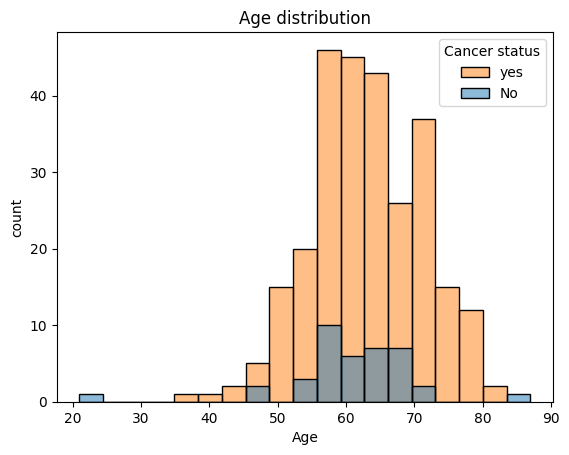

In [50]:
ax=sns.histplot(data=dataset,x='AGE',hue='LUNG_CANCER')
plt.legend(title='Cancer status',labels=['yes','No'])
ax.set(xlabel='Age',ylabel='count',title='Age distribution')
plt.show()

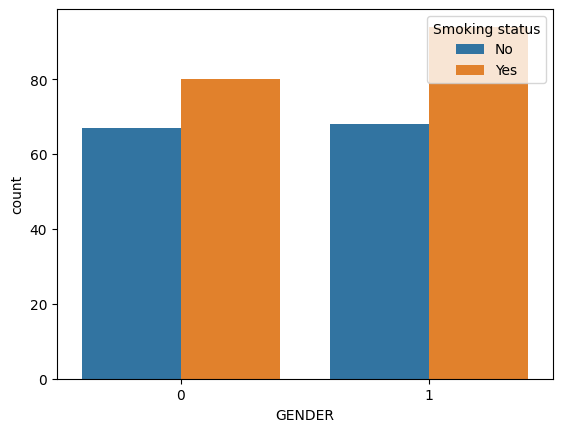

In [67]:
sns.countplot(data=dataset,x='GENDER',hue='SMOKING')
plt.legend(title='Smoking status',labels=['No','Yes'])
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [76]:
x=dataset.drop(columns=['LUNG_CANCER'],axis=1)
y=dataset['LUNG_CANCER']
str_x=StandardScaler()
x=str_x.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)


In [82]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [89]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.94      0.97      0.96        68

    accuracy                           0.92        78
   macro avg       0.85      0.79      0.81        78
weighted avg       0.92      0.92      0.92        78



In [95]:
import tensorflow as tf
from tensorflow.keras import models,Sequential,layers
import keras

In [104]:
model=models.Sequential([
    tf.keras.layers.Dense(128,input_dim=x_train.shape[1],activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [116]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=1000,batch_size=32,verbose=1,validation_split=0.3)

Epoch 1/1000
6/6 [==============================] - 2s 47ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.6372 - val_accuracy: 0.9286
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.9876 - val_loss: 1.7098 - val_accuracy: 0.9143
Epoch 3/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.8079 - val_accuracy: 0.9143
Epoch 4/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.9207 - val_accuracy: 0.9143
Epoch 5/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0117 - accuracy: 0.9938 - val_loss: 1.9233 - val_accuracy: 0.9143
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.9290 - val_accuracy: 0.9143
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.0228 - val_accuracy: 0.9000
Epoch 8/1000


6/6 [==============================] - 0s 14ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.2125 - val_accuracy: 0.9000
Epoch 59/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0100 - accuracy: 0.9938 - val_loss: 2.2396 - val_accuracy: 0.9000
Epoch 60/1000
6/6 [==============================] - 0s 22ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 2.2621 - val_accuracy: 0.9000
Epoch 61/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.0306 - accuracy: 0.9938 - val_loss: 2.2985 - val_accuracy: 0.9000
Epoch 62/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 2.3277 - val_accuracy: 0.9000
Epoch 63/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0287 - accuracy: 0.9876 - val_loss: 2.5928 - val_accuracy: 0.9000
Epoch 64/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0046 - accuracy: 0.9938 - val_loss: 2.7080 - val_accuracy: 0.9000
Epoch 65/1000
6/6 [=

6/6 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.4089 - val_accuracy: 0.9000
Epoch 116/1000
6/6 [==============================] - 0s 24ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.4022 - val_accuracy: 0.9000
Epoch 117/1000
6/6 [==============================] - 0s 20ms/step - loss: 3.0505e-04 - accuracy: 1.0000 - val_loss: 2.4076 - val_accuracy: 0.9000
Epoch 118/1000
6/6 [==============================] - 0s 20ms/step - loss: 6.5678e-04 - accuracy: 1.0000 - val_loss: 2.4202 - val_accuracy: 0.9000
Epoch 119/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0092 - accuracy: 0.9938 - val_loss: 2.4061 - val_accuracy: 0.9000
Epoch 120/1000
6/6 [==============================] - 0s 20ms/step - loss: 7.3896e-04 - accuracy: 1.0000 - val_loss: 2.4089 - val_accuracy: 0.9000
Epoch 121/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.4133 - val_accuracy: 0.9000
Ep

6/6 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 0.9938 - val_loss: 1.4034 - val_accuracy: 0.9143
Epoch 173/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0267 - accuracy: 0.9876 - val_loss: 1.3677 - val_accuracy: 0.9143
Epoch 174/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3375 - val_accuracy: 0.9143
Epoch 175/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.3203 - val_accuracy: 0.9143
Epoch 176/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0187 - accuracy: 0.9876 - val_loss: 1.3232 - val_accuracy: 0.9143
Epoch 177/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0249 - accuracy: 0.9938 - val_loss: 1.3538 - val_accuracy: 0.9143
Epoch 178/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.3353 - val_accuracy: 0.9143
Epoch 179/1000

6/6 [==============================] - 0s 16ms/step - loss: 9.7967e-04 - accuracy: 1.0000 - val_loss: 1.8374 - val_accuracy: 0.9143
Epoch 230/1000
6/6 [==============================] - 0s 11ms/step - loss: 7.4878e-04 - accuracy: 1.0000 - val_loss: 1.8597 - val_accuracy: 0.9143
Epoch 231/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.8712 - val_accuracy: 0.9143
Epoch 232/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.8804 - val_accuracy: 0.9143
Epoch 233/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.8762 - val_accuracy: 0.9143
Epoch 234/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.8759 - val_accuracy: 0.9143
Epoch 235/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0076 - accuracy: 0.9938 - val_loss: 1.8664 - val_accuracy: 0.9143
Epoch 

6/6 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8610 - val_accuracy: 0.9000
Epoch 287/1000
6/6 [==============================] - 0s 12ms/step - loss: 7.1378e-04 - accuracy: 1.0000 - val_loss: 1.8743 - val_accuracy: 0.9000
Epoch 288/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8833 - val_accuracy: 0.9000
Epoch 289/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8948 - val_accuracy: 0.9000
Epoch 290/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.9052 - val_accuracy: 0.9000
Epoch 291/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.9147 - val_accuracy: 0.9000
Epoch 292/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.9192 - val_accuracy: 0.9000
Epoch 293/

6/6 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9586 - val_accuracy: 0.9143
Epoch 344/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.9714 - val_accuracy: 0.9143
Epoch 345/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.9842 - val_accuracy: 0.9143
Epoch 346/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9992 - val_accuracy: 0.9143
Epoch 347/1000
6/6 [==============================] - 0s 17ms/step - loss: 4.7894e-04 - accuracy: 1.0000 - val_loss: 2.0115 - val_accuracy: 0.9143
Epoch 348/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.0223 - val_accuracy: 0.9143
Epoch 349/1000
6/6 [==============================] - 0s 25ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.0293 - val_accuracy: 0.9143
Epoch 350/

6/6 [==============================] - 0s 19ms/step - loss: 3.2328e-04 - accuracy: 1.0000 - val_loss: 2.3266 - val_accuracy: 0.9143
Epoch 400/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0089 - accuracy: 0.9938 - val_loss: 2.3190 - val_accuracy: 0.9143
Epoch 401/1000
6/6 [==============================] - 0s 24ms/step - loss: 6.3799e-04 - accuracy: 1.0000 - val_loss: 2.2771 - val_accuracy: 0.9143
Epoch 402/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0467 - accuracy: 0.9876 - val_loss: 2.3186 - val_accuracy: 0.9143
Epoch 403/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0258 - accuracy: 0.9938 - val_loss: 2.3001 - val_accuracy: 0.9143
Epoch 404/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0358 - accuracy: 0.9876 - val_loss: 2.1536 - val_accuracy: 0.9143
Epoch 405/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.0421 - val_accuracy: 0.9143
Epoch 

6/6 [==============================] - 0s 13ms/step - loss: 3.3856e-04 - accuracy: 1.0000 - val_loss: 2.7437 - val_accuracy: 0.9143
Epoch 457/1000
6/6 [==============================] - 0s 16ms/step - loss: 1.7223e-04 - accuracy: 1.0000 - val_loss: 2.7531 - val_accuracy: 0.9143
Epoch 458/1000
6/6 [==============================] - 0s 13ms/step - loss: 4.0262e-04 - accuracy: 1.0000 - val_loss: 2.7597 - val_accuracy: 0.9143
Epoch 459/1000
6/6 [==============================] - 0s 17ms/step - loss: 2.0272e-04 - accuracy: 1.0000 - val_loss: 2.7627 - val_accuracy: 0.9143
Epoch 460/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0046 - accuracy: 0.9938 - val_loss: 2.7646 - val_accuracy: 0.9143
Epoch 461/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.7670 - val_accuracy: 0.9143
Epoch 462/1000
6/6 [==============================] - 0s 24ms/step - loss: 9.9541e-05 - accuracy: 1.0000 - val_loss: 2.7685 - val_accuracy: 0

6/6 [==============================] - 0s 11ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.6817 - val_accuracy: 0.9000
Epoch 514/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.7045 - val_accuracy: 0.8857
Epoch 515/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0153 - accuracy: 0.9938 - val_loss: 1.7236 - val_accuracy: 0.8857
Epoch 516/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0124 - accuracy: 0.9938 - val_loss: 1.6856 - val_accuracy: 0.8857
Epoch 517/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.6496 - val_accuracy: 0.8857
Epoch 518/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.6395 - val_accuracy: 0.9000
Epoch 519/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.0100 - accuracy: 0.9938 - val_loss: 1.6342 - val_accuracy: 0.9000
Epoch 520/1000

6/6 [==============================] - 0s 17ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.7552 - val_accuracy: 0.9000
Epoch 571/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.7681 - val_accuracy: 0.9000
Epoch 572/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.7895 - val_accuracy: 0.9000
Epoch 573/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.8116 - val_accuracy: 0.9000
Epoch 574/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0083 - accuracy: 0.9938 - val_loss: 1.8453 - val_accuracy: 0.8857
Epoch 575/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.8899 - val_accuracy: 0.8857
Epoch 576/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.9108 - val_accuracy: 0.8857
Epoch 577/1000

6/6 [==============================] - 0s 20ms/step - loss: 0.0080 - accuracy: 0.9938 - val_loss: 2.2898 - val_accuracy: 0.8857
Epoch 628/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.2603 - val_accuracy: 0.8857
Epoch 629/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2516 - val_accuracy: 0.8857
Epoch 630/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.2557 - val_accuracy: 0.8857
Epoch 631/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.2731 - val_accuracy: 0.8857
Epoch 632/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.2932 - val_accuracy: 0.8857
Epoch 633/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.3176 - val_accuracy: 0.8857
Epoch 634/1000

6/6 [==============================] - 0s 15ms/step - loss: 0.0110 - accuracy: 0.9938 - val_loss: 2.5630 - val_accuracy: 0.8857
Epoch 685/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0107 - accuracy: 0.9938 - val_loss: 2.5666 - val_accuracy: 0.8857
Epoch 686/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 2.4526 - val_accuracy: 0.8857
Epoch 687/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.3971 - val_accuracy: 0.8857
Epoch 688/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0063 - accuracy: 0.9938 - val_loss: 2.3779 - val_accuracy: 0.8857
Epoch 689/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0049 - accuracy: 0.9938 - val_loss: 2.3932 - val_accuracy: 0.8857
Epoch 690/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.4402 - val_accuracy: 0.8857
Epoch 691/1000

6/6 [==============================] - 0s 15ms/step - loss: 0.0173 - accuracy: 0.9938 - val_loss: 2.6093 - val_accuracy: 0.9000
Epoch 742/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0172 - accuracy: 0.9938 - val_loss: 2.6120 - val_accuracy: 0.9000
Epoch 743/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0162 - accuracy: 0.9938 - val_loss: 2.6637 - val_accuracy: 0.8857
Epoch 744/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0052 - accuracy: 0.9938 - val_loss: 2.6969 - val_accuracy: 0.8857
Epoch 745/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.7221 - val_accuracy: 0.8857
Epoch 746/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.7418 - val_accuracy: 0.8857
Epoch 747/1000
6/6 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.7649 - val_accuracy: 0.8857
Epoch 748/1000

Epoch 798/1000
6/6 [==============================] - 0s 16ms/step - loss: 9.3847e-04 - accuracy: 1.0000 - val_loss: 4.1655 - val_accuracy: 0.8857
Epoch 799/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.1689 - val_accuracy: 0.8857
Epoch 800/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0056 - accuracy: 0.9938 - val_loss: 4.1634 - val_accuracy: 0.8857
Epoch 801/1000
6/6 [==============================] - 0s 14ms/step - loss: 1.2368e-04 - accuracy: 1.0000 - val_loss: 4.1520 - val_accuracy: 0.8857
Epoch 802/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 4.1731 - val_accuracy: 0.8857
Epoch 803/1000
6/6 [==============================] - 0s 13ms/step - loss: 5.2864e-04 - accuracy: 1.0000 - val_loss: 4.1996 - val_accuracy: 0.8857
Epoch 804/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.2127 - val_accu

6/6 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.3135 - val_accuracy: 0.8857
Epoch 855/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.3178 - val_accuracy: 0.8857
Epoch 856/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0059 - accuracy: 0.9938 - val_loss: 3.3005 - val_accuracy: 0.8857
Epoch 857/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.2996 - val_accuracy: 0.8857
Epoch 858/1000
6/6 [==============================] - 0s 17ms/step - loss: 7.5566e-04 - accuracy: 1.0000 - val_loss: 3.3146 - val_accuracy: 0.8857
Epoch 859/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0061 - accuracy: 0.9938 - val_loss: 3.3407 - val_accuracy: 0.8857
Epoch 860/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.3305 - val_accuracy: 0.8857
Epoch 861/

Epoch 911/1000
6/6 [==============================] - 0s 18ms/step - loss: 6.7829e-05 - accuracy: 1.0000 - val_loss: 4.0999 - val_accuracy: 0.8857
Epoch 912/1000
6/6 [==============================] - 0s 16ms/step - loss: 6.4461e-04 - accuracy: 1.0000 - val_loss: 4.1106 - val_accuracy: 0.8857
Epoch 913/1000
6/6 [==============================] - 0s 18ms/step - loss: 6.8965e-04 - accuracy: 1.0000 - val_loss: 4.1210 - val_accuracy: 0.8857
Epoch 914/1000
6/6 [==============================] - 0s 16ms/step - loss: 1.2017e-04 - accuracy: 1.0000 - val_loss: 4.1273 - val_accuracy: 0.8857
Epoch 915/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.1372 - val_accuracy: 0.8857
Epoch 916/1000
6/6 [==============================] - 0s 15ms/step - loss: 2.5357e-04 - accuracy: 1.0000 - val_loss: 4.1411 - val_accuracy: 0.8857
Epoch 917/1000
6/6 [==============================] - 0s 15ms/step - loss: 7.9779e-04 - accuracy: 1.0000 - val_loss: 4.167

6/6 [==============================] - 0s 15ms/step - loss: 3.6704e-04 - accuracy: 1.0000 - val_loss: 3.9908 - val_accuracy: 0.8857
Epoch 968/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.0122 - val_accuracy: 0.8857
Epoch 969/1000
6/6 [==============================] - 0s 15ms/step - loss: 0.0095 - accuracy: 0.9938 - val_loss: 4.1763 - val_accuracy: 0.8857
Epoch 970/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 4.2718 - val_accuracy: 0.8857
Epoch 971/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3231 - val_accuracy: 0.8857
Epoch 972/1000
6/6 [==============================] - 0s 17ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.3436 - val_accuracy: 0.8857
Epoch 973/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.3589 - val_accuracy: 0.8857
Epoch 974/

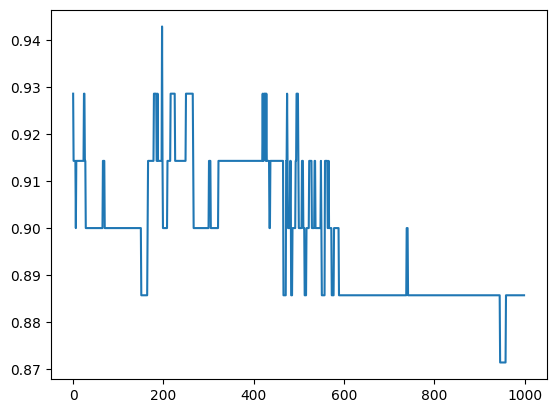

In [118]:
plt.plot(history.history['val_accuracy'])